In [1]:
import numpy as np
import pandas as pd

from  scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

In [2]:
# working file location

DATASET_PATH = './test.csv'

In [3]:
# result File

PREPARED_DATASET_PATH = './prepared_4_test.csv'

# 1. Start working with Data

In [4]:
df = pd.read_csv(DATASET_PATH, sep=',')

In [5]:
# Display Data

df.sample(n = 5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3735,14018,30,1.0,50.729276,47.285002,1.0,6,25.0,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B
4835,1338,6,2.0,52.381959,51.789611,1.0,9,7.0,2016,0.243205,B,B,5,1564,0,540.0,0,0,B
3070,13027,23,3.0,70.390408,3.922677,1.0,4,3.0,2017,0.005767,B,B,1,388,0,NaN,0,0,B
4887,14015,6,2.0,65.743437,4.104411,1.0,15,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
3912,4862,96,1.0,44.824436,21.891382,9.0,10,8.0,2011,0.041116,B,B,53,14892,4,NaN,1,4,B


In [6]:
# Get shape (rows, columns)

df.shape

(5000, 19)

In [7]:
# Get columns

df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2'],
      dtype='object')

In [8]:
# Get DataFarme overview

df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


# Remove Columns

In [9]:
# In this case apartment No. is not that important, can be removed

wdf = df.drop(['Id'], axis=1)
wdf

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B


In [10]:
# In this case district No. is not that important, can be removed

wdf = df.drop(['DistrictId'], axis=1)
wdf

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B


In [11]:
wdf.drop('Id', axis=1, inplace=True)

# 2. Working With Empty Data

In [12]:
df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [13]:
# Create a new Feature, set all rows with zero value

wdf['LifeSquare_nan'] = 0 

In [14]:
# Swap 0 into 1, where data is NaN

wdf.loc[ wdf['LifeSquare'].isna(), 'LifeSquare_nan' ] = 1

In [15]:
# Create a new Feature, set all rows with zero value

wdf['Healthcare_1_nan'] = 0 

In [16]:
# Swap 0 into 1, where data is NaN

wdf.loc[ wdf['Healthcare_1'].isna(), 'Healthcare_1_nan' ] = 1

In [17]:
wdf.sample(n=5)

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,LifeSquare_nan,Healthcare_1_nan
163,1.0,35.516639,22.000906,6.0,5,9.0,1975,0.313925,B,B,22,4625,11,3855.0,2,10,B,0,0
931,3.0,104.151513,NaN,1.0,19,25.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,1,1
2531,2.0,64.090708,65.297206,12.0,2,9.0,2018,0.007122,B,B,1,264,0,NaN,0,1,B,0,1
1040,3.0,72.371093,47.267032,10.0,2,17.0,2000,0.000000,B,B,36,6714,2,2672.0,0,2,B,0,0
4369,3.0,79.172401,NaN,1.0,10,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,1,1


In [18]:
# Calculate median for 2 columns

medians = wdf[['LifeSquare', 'Healthcare_1']].median()
medians

LifeSquare       32.925087
Healthcare_1    900.000000
dtype: float64

In [19]:
# Replace empty data with a median value in 2 columns at once

wdf[['LifeSquare', 'Healthcare_1']] = \
    wdf[['LifeSquare', 'Healthcare_1']].fillna(medians)

In [20]:
# Display Columns with Empty Data

wdf[ (wdf['LifeSquare'].isnull()) | (wdf['LifeSquare']==u'') |\
    (wdf['Healthcare_1'].isnull()) | (wdf['Healthcare_1']==u'')]

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,LifeSquare_nan,Healthcare_1_nan


In [21]:
wdf.sample(n=5)

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,LifeSquare_nan,Healthcare_1_nan
3495,1.0,24.170511,12.632946,3.0,10,9.0,1973,0.161976,B,A,31,7010,5,4508.0,3,7,B,0,0
2272,3.0,65.592597,45.349383,7.0,5,12.0,1973,0.007659,B,B,35,7077,56,2301.0,3,19,B,0,0
2429,2.0,64.098943,32.925087,1.0,15,17.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,1,1
3864,3.0,91.227361,52.273982,10.0,8,17.0,2012,0.075779,B,B,6,1437,3,900.0,0,2,B,0,1
2203,3.0,61.556137,43.994397,5.0,4,9.0,1978,0.000000,B,B,39,8647,0,810.0,0,5,B,0,0


# Working With Strings

In [22]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rooms             5000 non-null   float64
 1   Square            5000 non-null   float64
 2   LifeSquare        5000 non-null   float64
 3   KitchenSquare     5000 non-null   float64
 4   Floor             5000 non-null   int64  
 5   HouseFloor        5000 non-null   float64
 6   HouseYear         5000 non-null   int64  
 7   Ecology_1         5000 non-null   float64
 8   Ecology_2         5000 non-null   object 
 9   Ecology_3         5000 non-null   object 
 10  Social_1          5000 non-null   int64  
 11  Social_2          5000 non-null   int64  
 12  Social_3          5000 non-null   int64  
 13  Healthcare_1      5000 non-null   float64
 14  Helthcare_2       5000 non-null   int64  
 15  Shops_1           5000 non-null   int64  
 16  Shops_2           5000 non-null   object 


# From String into Categorical values

In [23]:
# Display diff val types

wdf['Ecology_2'].value_counts()

B    4952
A      48
Name: Ecology_2, dtype: int64

In [24]:

def Ecology_2_to_cat(X):
    
    # Create new Feature, assign all values to 0
    
    X['Ecology_2_cat'] = 0
    
    # If 'Ecology_2' is 'A', 'Ecology_2_cat' set to 1
    
    X.loc[X['Ecology_2'] == 'A', 'Ecology_2_cat'] = 1
    
    # If 'Ecology_2' is 'B', 'Ecology_2_cat' set to  2
    
    X.loc[X['Ecology_2'] == 'B', 'Ecology_2_cat'] = 2
    
    return X

In [25]:
# Assign existing DataFrame to the result which function returns

# Passing existing DataFrame to the function

# Return new DataFrame with new feature 'Ecology_2_cat'

wdf = Ecology_2_to_cat(wdf)
wdf.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,LifeSquare_nan,Healthcare_1_nan,Ecology_2_cat
0,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B,0,0,2
1,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,900.0,0,0,A,0,1,2
2,2.0,59.463678,32.925087,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,1,1,2
3,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,900.0,0,0,B,0,1,2
4,1.0,53.837056,32.925087,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B,1,0,2


### Do the same with feature: Ecology_3

In [26]:
# Display diff val types

wdf['Ecology_3'].value_counts()

B    4851
A     149
Name: Ecology_3, dtype: int64

In [27]:

def Ecology_3_to_cat(X):
    
    # Create new Feature, assign all values to 0
    
    X['Ecology_3_cat'] = 0
    
    # If 'Ecology_3' is 'A', 'Ecology_3_cat' set to 1
    
    X.loc[X['Ecology_3'] == 'A', 'Ecology_3_cat'] = 1
    
    # If 'Ecology_3' is 'B', 'Ecology_3_cat' set to  2
    
    X.loc[X['Ecology_3'] == 'B', 'Ecology_3_cat'] = 2
    
    return X

In [28]:
# Assign existing DataFrame to the result which function returns

# Passing existing DataFrame to the function

# Return new DataFrame with new feature 'Ecology_3_cat'

wdf = Ecology_3_to_cat(wdf)
wdf.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,LifeSquare_nan,Healthcare_1_nan,Ecology_2_cat,Ecology_3_cat
0,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,...,4378,0,1036.0,1,1,B,0,0,2,2
1,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,...,629,1,900.0,0,0,A,0,1,2,2
2,2.0,59.463678,32.925087,9.0,19,19.0,1977,0.211401,B,B,...,1892,0,900.0,0,1,B,1,1,2,2
3,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,...,475,0,900.0,0,0,B,0,1,2,2
4,1.0,53.837056,32.925087,1.0,8,17.0,1977,0.309479,B,B,...,7715,4,990.0,0,6,B,1,0,2,2


### Do the same with feature: Shops_2

In [29]:
# Display diff val types

wdf['Shops_2'].value_counts()

B    4588
A     412
Name: Shops_2, dtype: int64

In [30]:

def Shops_2_to_cat(X):
    
    # Create new Feature, assign all values to 0
    
    X['Shops_2_cat'] = 0
    
    # If 'Shops_2' is 'A', 'Shops_2_cat' set to 1
    
    X.loc[X['Shops_2'] == 'A', 'Shops_2_cat'] = 1
    
    # If 'Shops_2' is 'B', 'Shops_2_cat' set to  2
    
    X.loc[X['Shops_2'] == 'B', 'Shops_2_cat'] = 2
    
    return X

In [31]:
# Assign existing DataFrame to the result which function returns

# Passing existing DataFrame to the function

# Return new DataFrame with new feature 'Shops_2_cat'

wdf = Shops_2_to_cat(wdf)
wdf.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,LifeSquare_nan,Healthcare_1_nan,Ecology_2_cat,Ecology_3_cat,Shops_2_cat
0,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,...,0,1036.0,1,1,B,0,0,2,2,2
1,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,...,1,900.0,0,0,A,0,1,2,2,1
2,2.0,59.463678,32.925087,9.0,19,19.0,1977,0.211401,B,B,...,0,900.0,0,1,B,1,1,2,2,2
3,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,...,0,900.0,0,0,B,0,1,2,2,2
4,1.0,53.837056,32.925087,1.0,8,17.0,1977,0.309479,B,B,...,4,990.0,0,6,B,1,0,2,2,2


# Create Dummy Tables

In [32]:
# binary_to_numbers = {'A': 0, 'B': 1}
# wdf['Ecology_2'] = wdf['Ecology_2'].replace(binary_to_numbers)
# wdf['Ecology_3'] = wdf['Ecology_3'].replace(binary_to_numbers)
# wdf['Shops_2'] = wdf['Shops_2'].replace(binary_to_numbers)

In [33]:
# Create DataFarame where 1 is True and 0 is False

tmp_df = pd.get_dummies(wdf['Ecology_2'], prefix='Ecology_2')
tmp_df.head()

,Ecology_2_A,Ecology_2_B
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [34]:
# Concatinate this DataFrame to working data(DataFrame)

wdf = pd.concat([ wdf, pd.get_dummies(wdf['Ecology_2'], prefix='Ecology_2')], axis=1)

### Do the same for feature: Ecology_3

In [35]:
# Create DataFarame where 1 is True and 0 is False

tmp_df = pd.get_dummies(wdf['Ecology_3'], prefix='Ecology_3')
tmp_df.head()

,Ecology_3_A,Ecology_3_B
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [36]:
# Concatinate this DataFrame to working data(DataFrame)

wdf = pd.concat([ wdf, pd.get_dummies(wdf['Ecology_3'], prefix='Ecology_3')], axis=1)

In [37]:
# Show Result

wdf.sample(n=5)

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Shops_2,LifeSquare_nan,Healthcare_1_nan,Ecology_2_cat,Ecology_3_cat,Shops_2_cat,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B
4061,3.0,56.440306,35.873737,6.0,5,9.0,1973,0.040243,B,B,...,B,0,0,2,2,2,0,1,0,1
3993,2.0,59.757302,34.586129,0.0,13,0.0,1977,0.017647,B,B,...,B,0,1,2,2,2,0,1,0,1
3365,1.0,45.692875,21.032877,8.0,6,14.0,1997,0.090799,B,B,...,B,0,1,2,2,2,0,1,0,1
4437,1.0,47.010431,22.589822,9.0,20,27.0,2016,0.007122,B,B,...,B,0,1,2,2,2,0,1,0,1
547,3.0,67.616705,40.215765,8.0,9,9.0,1977,0.210473,B,B,...,B,0,0,2,2,2,0,1,0,1


In [38]:
wdf['Shops_2'].value_counts()

B    4588
A     412
Name: Shops_2, dtype: int64

### Do the same for feature: Shops_2

In [39]:
# Create DataFarame where 1 is True and 0 is False

tmp_df = pd.get_dummies(wdf['Shops_2'], prefix='Shops_2')
tmp_df.head()

,Shops_2_A,Shops_2_B
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [40]:
# Concatinate this DataFrame to working data(DataFrame)

wdf = pd.concat([ wdf, pd.get_dummies(wdf['Shops_2'], prefix='Shops_2')], axis=1)

In [41]:
# Show Result

wdf.sample(n=5)

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Healthcare_1_nan,Ecology_2_cat,Ecology_3_cat,Shops_2_cat,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
4791,2.0,76.293714,41.082697,14.0,20,30.0,2012,0.000000,B,B,...,0,2,2,2,0,1,0,1,0,1
1596,3.0,82.288812,32.925087,1.0,16,17.0,1977,0.007122,B,B,...,1,2,2,2,0,1,0,1,0,1
3062,1.0,30.771373,16.201885,5.0,4,9.0,2003,0.041116,B,B,...,1,2,2,2,0,1,0,1,0,1
2984,1.0,40.545484,23.247434,8.0,5,14.0,1998,0.041365,B,B,...,1,2,2,2,0,1,0,1,0,1
1959,1.0,45.895518,1.457365,1.0,10,15.0,2018,0.072158,B,B,...,1,2,2,1,0,1,0,1,1,0


# Delete features

In [42]:
# After, when features: Ecology _2, Ecology _3, Shops _2, 
# are converted into a more useful data structures, 
# they can be deleted

In [43]:
# Drop feature 'Ecology_2'

wdf = wdf.drop(['Ecology_2'], axis=1)

In [44]:
# Drop feature 'Ecology_3'

wdf = wdf.drop(['Ecology_3'], axis=1)

In [45]:
# Drop feature 'Shops_2'

wdf = wdf.drop(['Shops_2'], axis=1)

In [46]:
# Checking that all Strings are Processed

wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rooms             5000 non-null   float64
 1   Square            5000 non-null   float64
 2   LifeSquare        5000 non-null   float64
 3   KitchenSquare     5000 non-null   float64
 4   Floor             5000 non-null   int64  
 5   HouseFloor        5000 non-null   float64
 6   HouseYear         5000 non-null   int64  
 7   Ecology_1         5000 non-null   float64
 8   Social_1          5000 non-null   int64  
 9   Social_2          5000 non-null   int64  
 10  Social_3          5000 non-null   int64  
 11  Healthcare_1      5000 non-null   float64
 12  Helthcare_2       5000 non-null   int64  
 13  Shops_1           5000 non-null   int64  
 14  LifeSquare_nan    5000 non-null   int64  
 15  Healthcare_1_nan  5000 non-null   int64  
 16  Ecology_2_cat     5000 non-null   int64  


In [47]:
wdf.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Healthcare_1_nan,Ecology_2_cat,Ecology_3_cat,Shops_2_cat,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.910000,56.449500,35.485549,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,...,0.475400,1.990400,1.970200,1.917600,0.009600,0.990400,0.029800,0.970200,0.082400,0.917600
std,0.838594,19.092787,15.915345,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,...,0.499444,0.097518,0.170052,0.275001,0.097518,0.097518,0.170052,0.170052,0.275001,0.275001
min,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,41.906231,25.850152,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,...,0.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,...,0.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,66.285129,41.769526,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,...,1.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Create new features

### Floor Cat

In [48]:
# Create new feature: floor_cat, split floors into 5 categories

def floor_to_cat(df):
    
    # Create new feature, assign all values to 0
    df['floor_cat'] = 0
    
    df.loc[ df['Floor'] <= 3, 'floor_cat' ] = 1
    df.loc[ (df['Floor'] > 3) & (df['Floor'] <= 5), 'floor_cat' ] = 2
    df.loc[ (df['Floor'] > 5) & (df['Floor'] <= 9), 'floor_cat' ] = 3
    df.loc[ (df['Floor'] > 9) & (df['Floor'] <= 15), 'floor_cat' ] = 4
    df.loc[ df['Floor'] > 15, 'floor_cat' ] = 5

    return df
    

In [49]:
wdf = floor_to_cat(wdf)

In [50]:
wdf.sample(n=5)

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Ecology_2_cat,Ecology_3_cat,Shops_2_cat,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,floor_cat
3104,3.0,62.323446,43.677216,6.0,8,9.0,1977,0.300323,52,10311,...,2,2,2,0,1,0,1,0,1,3
2492,1.0,45.887634,18.072497,1.0,4,3.0,2014,0.075424,11,3097,...,2,2,2,0,1,0,1,0,1,2
737,1.0,39.477852,24.189168,6.0,5,9.0,1978,0.100456,43,7227,...,2,2,1,0,1,0,1,1,0,2
1938,2.0,50.413167,32.775042,6.0,2,12.0,1976,0.521867,25,6149,...,2,2,2,0,1,0,1,0,1,1
3728,1.0,38.007217,20.940004,10.0,5,9.0,1971,0.428826,25,5011,...,2,2,2,0,1,0,1,0,1,2


### Flat price based on room qty

In [51]:
def newFeatureBasedPrice(X):
    if 'Price' in X.columns:
        price_based_rooms = X.groupby('Rooms').agg({'Price':'median'}).rename(columns={'Price':'MedPriceByRooms'})
        X = X.merge(price_based_rooms, on=['Rooms'], how='left')
    return X

In [52]:
tmp = newFeatureBasedPrice(wdf)
tmp.columns

Index(['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3',
       'Healthcare_1', 'Helthcare_2', 'Shops_1', 'LifeSquare_nan',
       'Healthcare_1_nan', 'Ecology_2_cat', 'Ecology_3_cat', 'Shops_2_cat',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'floor_cat'],
      dtype='object')

In [53]:
wdf.sample(n=5)

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Ecology_2_cat,Ecology_3_cat,Shops_2_cat,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,floor_cat
1776,1.0,39.990071,24.402067,10.0,12,22.0,1987,0.037178,52,11217,...,2,2,2,0,1,0,1,0,1,4
4801,3.0,68.545727,47.412839,6.0,3,9.0,1981,0.130618,39,10418,...,2,2,2,0,1,0,1,0,1,1
3428,3.0,71.532777,46.842588,8.0,4,5.0,1963,0.149666,22,4789,...,2,2,2,0,1,0,1,0,1,2
4428,1.0,37.292374,17.440489,5.0,5,5.0,1962,0.151346,32,5889,...,2,1,2,0,1,1,0,0,1,2
3342,2.0,63.076113,32.925087,1.0,14,17.0,1977,0.437885,23,5735,...,2,2,2,0,1,0,1,0,1,4


# Working with outliers

In [54]:
# Rooms-----------min: 0.00, max is 19

# Square----------min: 1.13, max: 641

# LifeSquare------min: 0.37, max: 7480.5

# KitchenSquare---min: 0.00, max: 2014

# Floor-----------min: 1,    max: 42

# HouseFloor------min: 0,    max: 117

array([[<AxesSubplot:title={'center':'Square'}>,
        <AxesSubplot:title={'center':'LifeSquare'}>,
        <AxesSubplot:title={'center':'Floor'}>],
       [<AxesSubplot:title={'center':'HouseFloor'}>,
        <AxesSubplot:title={'center':'HouseYear'}>,
        <AxesSubplot:title={'center':'Ecology_1'}>],
       [<AxesSubplot:title={'center':'Social_1'}>,
        <AxesSubplot:title={'center':'Social_2'}>,
        <AxesSubplot:title={'center':'Social_3'}>],
       [<AxesSubplot:title={'center':'Healthcare_1'}>,
        <AxesSubplot:title={'center':'Helthcare_2'}>,
        <AxesSubplot:title={'center':'Shops_1'}>]], dtype=object)

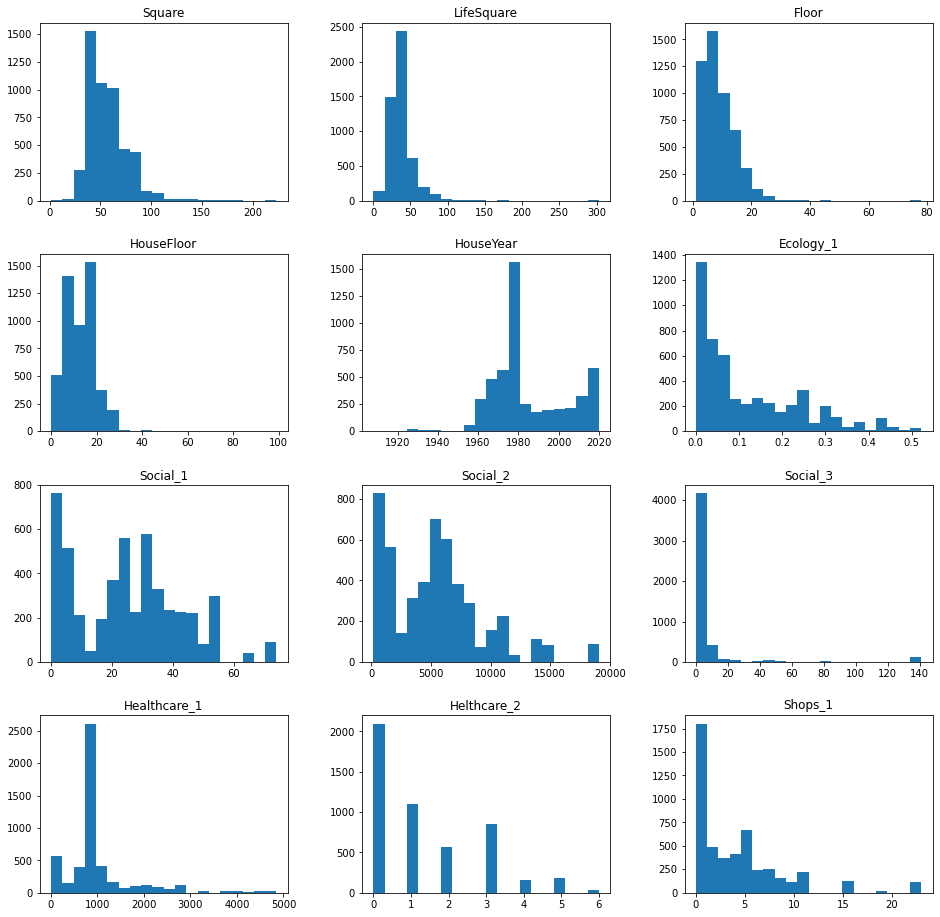

In [55]:
# What datatypes include in to the list of graphs

df_visual_check = wdf.select_dtypes(include=['int64', 'float64'])

# Remove features that have no interest in this case

df_visual_check.drop('LifeSquare_nan', axis=1, inplace=True)
df_visual_check.drop('Healthcare_1_nan', axis=1, inplace=True)
df_visual_check.drop('Ecology_2_cat', axis=1, inplace=True)
df_visual_check.drop('Ecology_3_cat', axis=1, inplace=True)
df_visual_check.drop('Shops_2_cat', axis=1, inplace=True)
df_visual_check.drop('floor_cat', axis=1, inplace=True)
# df_visual_check.drop('Rooms_outlier', axis=1, inplace=True)


df_visual_check.drop('Rooms', axis=1, inplace=True)
df_visual_check.drop('KitchenSquare', axis=1, inplace=True)

# Graphs config

df_visual_check.hist(figsize=(16, 16), bins=20, grid=False) 

### Rooms

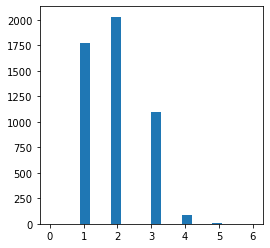

In [56]:
# Let's pretend that flats may contain 1 - 5 rooms.

wdf[wdf['Rooms'] < 10]['Rooms'].hist(figsize=(4, 4), bins=20, grid=False);

In [57]:
# Create new feature 'Rooms_outlier' set all values to 0

wdf['Rooms_outlier'] = 0

# If feature 'Rooms' is 0 or more than 5 set values to 1

wdf.loc[ (wdf['Rooms'] == 0) | (wdf['Rooms'] >= 6), 'Rooms_outlier' ] = 1

In [58]:
wdf[ wdf['Rooms_outlier'] == 1 ]

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Ecology_3_cat,Shops_2_cat,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,floor_cat,Rooms_outlier
956,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,53,14892,...,2,2,0,1,0,1,0,1,1,1
961,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,23,5735,...,2,2,0,1,0,1,0,1,1,1
1981,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,23,4635,...,2,2,0,1,0,1,0,1,4,1
2243,6.0,110.750226,32.925087,0.0,2,2.0,2015,0.014073,2,475,...,2,2,0,1,0,1,0,1,1,1
4179,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,2,469,...,2,2,0,1,0,1,0,1,4,1


In [59]:
# Pretend that flats which has more than 5 rooms, let's set their qty to the median value of total rooms

wdf.loc[wdf['Rooms'] >= 6, 'Rooms'] = wdf['Rooms'].median()

In [60]:
# Let's pretend that value 0 was given by mistake, and replace it with value: 1

wdf.loc[wdf['Rooms'] == 0, 'Rooms'] = 1

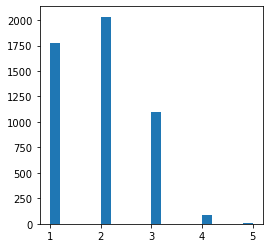

In [61]:
# Display graphical result

wdf[wdf['Rooms'] < 6]['Rooms'].hist(figsize=(4, 4), bins=20, grid=False);

### KitchenSquare

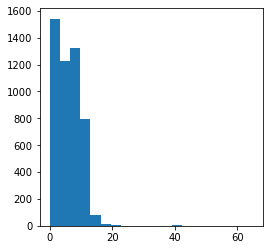

In [62]:
wdf[wdf['KitchenSquare'] <= 75]['KitchenSquare'].hist(figsize=(4, 4), bins=20, grid=False);

In [63]:
wdf['KitchenSquare'].value_counts()

1.0      1191
5.0       612
8.0       606
6.0       595
10.0      558
9.0       417
0.0       335
7.0       297
12.0      132
11.0      107
13.0       33
4.0        21
14.0       20
15.0       17
16.0       13
3.0        11
17.0        5
2.0         4
18.0        3
42.0        3
19.0        2
20.0        2
65.0        1
34.0        1
60.0        1
112.0       1
44.0        1
33.0        1
40.0        1
22.0        1
61.0        1
97.0        1
62.0        1
24.0        1
41.0        1
30.0        1
57.0        1
620.0       1
Name: KitchenSquare, dtype: int64

In [64]:
tmp = (wdf['KitchenSquare'].isna()) | (wdf['KitchenSquare'] > wdf['KitchenSquare'].quantile(.975))

wdf.loc[tmp, 'KitchenSquare'] = wdf['KitchenSquare'].median()

In [65]:
wdf.loc[wdf['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [66]:
wdf['KitchenSquare'].value_counts()

3.0     1541
6.0      709
5.0      612
8.0      606
10.0     558
9.0      417
7.0      297
12.0     132
11.0     107
4.0       21
Name: KitchenSquare, dtype: int64

### HouseFloor

In [67]:
wdf['HouseFloor'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 36., 37., 39., 40.,
       48., 99.])

In [68]:
def house_floor_outlier(df):
    
    # Create new feature, assign all values to 0
    df['HouseFloor_outlier'] = 0
    
    df.loc[ df['Floor'] == 0, 'HouseFloor_outlier' ] = 1
    df.loc[ df['Floor'] > df['HouseFloor'], 'HouseFloor_outlier' ] = 1
    

    return df

In [69]:
# Ccreate new feature which represents that in this column was faulty data

wdf = house_floor_outlier(wdf)
wdf.sample(n=5)

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_2_cat,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,floor_cat,Rooms_outlier,HouseFloor_outlier
609,1.0,41.472481,23.161990,8.0,12,17.0,1996,0.041116,53,14892,...,2,0,1,0,1,0,1,4,0,0
3505,2.0,62.317422,32.925087,3.0,3,1.0,2015,0.000078,22,6398,...,2,0,1,0,1,0,1,1,0,1
788,2.0,78.969003,32.925087,3.0,10,1.0,1977,0.075779,6,1437,...,2,0,1,0,1,0,1,4,0,1
3336,2.0,64.266387,32.925087,3.0,3,17.0,1977,0.007122,1,264,...,2,0,1,0,1,0,1,1,0,0
4887,2.0,65.743437,4.104411,3.0,15,17.0,1977,0.243205,5,1564,...,2,0,1,0,1,0,1,4,0,0


In [70]:
wdf['HouseFloor'].describe()

count    5000.000000
mean       12.601000
std         6.789213
min         0.000000
25%         9.000000
50%        12.000000
75%        17.000000
max        99.000000
Name: HouseFloor, dtype: float64

In [71]:
wdf[wdf['HouseFloor'] == 0]

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_2_cat,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,floor_cat,Rooms_outlier,HouseFloor_outlier
52,1.0,47.095406,32.925087,3.0,4,0.0,1977,0.072158,2,629,...,1,0,1,0,1,1,0,2,0,1
61,3.0,83.670032,46.358356,3.0,8,0.0,2015,0.072158,2,629,...,1,0,1,0,1,1,0,3,0,1
93,1.0,43.835919,32.925087,3.0,9,0.0,1977,0.072158,2,629,...,1,0,1,0,1,1,0,3,0,1
95,3.0,99.293191,32.925087,3.0,2,0.0,1977,0.075424,11,3097,...,2,0,1,0,1,0,1,1,0,1
164,2.0,73.868460,32.925087,3.0,9,0.0,1977,0.075779,6,1437,...,2,0,1,0,1,0,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,3.0,79.798209,32.925087,3.0,17,0.0,1977,0.195781,23,5212,...,2,0,1,0,1,0,1,5,0,1
4817,1.0,53.263561,32.925087,3.0,9,0.0,1977,0.072158,2,629,...,1,0,1,0,1,1,0,3,0,1
4928,1.0,48.530248,32.925087,3.0,8,0.0,1977,0.178917,18,3594,...,2,0,1,0,1,0,1,3,0,1
4951,2.0,65.548249,35.071278,3.0,17,0.0,1977,0.017647,2,469,...,2,0,1,0,1,0,1,5,0,1


In [72]:
# This Method fill 0 values with median(), and values > max floor fills with random value


def set_house_floor(X):
    
    X.loc[df['HouseFloor'] == 0, 'HouseFloor'] = X['HouseFloor'].median()
    
    floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
    
    X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor'] = np.random.randint(1, X['Floor'].max() + 1)
    
    return X

In [73]:
# Calling method

wdf = set_house_floor(wdf)

In [74]:
# Check Result for foor no. > max floor qty

(wdf['Floor'] > wdf['HouseFloor']).sum()

0

### HouseYear

In [75]:
wdf['HouseYear'].value_counts(ascending=True)

1908       1
1909       1
1934       1
1950       1
1910       1
        ... 
1970     111
2017     141
2015     159
2016     172
1977    1298
Name: HouseYear, Length: 97, dtype: int64

In [76]:
# This method replaces all values that are bigger than the current year with the current year

import datetime

def fix_house_years(X):
    
    current_year = datetime.datetime.now().year
    
    X.loc[ X['HouseYear'] > current_year, 'HouseYear'] = current_year
    
    return X

In [77]:
# Calling method

wdf = fix_house_years(wdf)

In [78]:
# Check result

wdf[wdf['HouseYear'] >= 2021]

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_2_cat,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,floor_cat,Rooms_outlier,HouseFloor_outlier


In [79]:
wdf.columns

Index(['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3',
       'Healthcare_1', 'Helthcare_2', 'Shops_1', 'LifeSquare_nan',
       'Healthcare_1_nan', 'Ecology_2_cat', 'Ecology_3_cat', 'Shops_2_cat',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'floor_cat', 'Rooms_outlier', 'HouseFloor_outlier'],
      dtype='object')

### Square

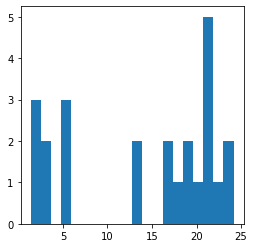

In [80]:
wdf[wdf['Square'] <= 25]['Square'].hist(figsize=(4, 4), bins=20, grid=False);

In [81]:
# Get the sum of features

res = wdf['KitchenSquare'] + wdf['LifeSquare']

# If the condition is true, replace it with the sum of the features

wdf.loc[(wdf['Square'] < res) == True, 'Square'] = res

In [82]:
# Result, which proofs, that there are no conditions where:'Square' < than the sum of 'KitchenSquare' and 'LifeSquare'

wdf.loc[wdf['Square'] < (wdf['KitchenSquare'] + wdf['LifeSquare'])]

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_2_cat,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,floor_cat,Rooms_outlier,HouseFloor_outlier


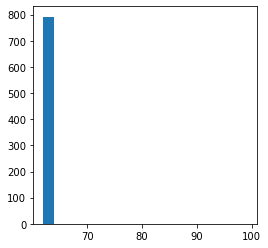

In [83]:
# Seems that 'HouseFloor' that bigger than 50 is outliers

wdf[wdf['HouseFloor'] > 50]['HouseFloor'].hist(figsize=(4, 4), bins=20, grid=False);

In [84]:
# Replace outliers with median data

wdf.loc[wdf['HouseFloor'] > 50, 'HouseFloor'] = wdf['HouseFloor'].median()

In [85]:
# Check Result

wdf[wdf['HouseFloor'] > 50]

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_2_cat,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,floor_cat,Rooms_outlier,HouseFloor_outlier


# Format data

In [86]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [87]:
# Display data size before format

wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rooms               5000 non-null   float64
 1   Square              5000 non-null   float64
 2   LifeSquare          5000 non-null   float64
 3   KitchenSquare       5000 non-null   float64
 4   Floor               5000 non-null   int64  
 5   HouseFloor          5000 non-null   float64
 6   HouseYear           5000 non-null   int64  
 7   Ecology_1           5000 non-null   float64
 8   Social_1            5000 non-null   int64  
 9   Social_2            5000 non-null   int64  
 10  Social_3            5000 non-null   int64  
 11  Healthcare_1        5000 non-null   float64
 12  Helthcare_2         5000 non-null   int64  
 13  Shops_1             5000 non-null   int64  
 14  LifeSquare_nan      5000 non-null   int64  
 15  Healthcare_1_nan    5000 non-null   int64  
 16  Ecolog

In [88]:
# format data

wdf = reduce_mem_usage(wdf)

Memory usage of dataframe is 0.87 MB
Memory usage after optimization is: 0.33 MB
Decreased by 61.5%


In [89]:
# Display results

wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rooms               5000 non-null   float32
 1   Square              5000 non-null   float32
 2   LifeSquare          5000 non-null   float32
 3   KitchenSquare       5000 non-null   float32
 4   Floor               5000 non-null   int8   
 5   HouseFloor          5000 non-null   float32
 6   HouseYear           5000 non-null   int16  
 7   Ecology_1           5000 non-null   float32
 8   Social_1            5000 non-null   int8   
 9   Social_2            5000 non-null   int16  
 10  Social_3            5000 non-null   int16  
 11  Healthcare_1        5000 non-null   float32
 12  Helthcare_2         5000 non-null   int8   
 13  Shops_1             5000 non-null   int8   
 14  LifeSquare_nan      5000 non-null   int8   
 15  Healthcare_1_nan    5000 non-null   int8   
 16  Ecolog

# Group Features

In [90]:
wdf.columns.tolist()

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'LifeSquare_nan',
 'Healthcare_1_nan',
 'Ecology_2_cat',
 'Ecology_3_cat',
 'Shops_2_cat',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B',
 'floor_cat',
 'Rooms_outlier',
 'HouseFloor_outlier']

In [91]:
features = [
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1'
]

new_features = [
 'LifeSquare_nan',
 'Healthcare_1_nan',
 'Ecology_2_cat',
 'Ecology_3_cat',
 'Shops_2_cat',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B',
 'MedPriceByRooms',
 'Rooms_outlier',
 'HouseFloor_outlier'
]

target = ['Price']

# Store Data 

In [92]:
# Store DataFrame into file without indexes

wdf.to_csv( PREPARED_DATASET_PATH, index = False )